# TP 2.2 : Estimation

## 1. Loi de Pareto

On considère dans cette partie une variable aléatoire suivant une loi de Pareto d'indice $\alpha$. C'est-à-dire $X\sim \mathcal{P}(\alpha)$ si 
$$
\mathbb{P}(X>t)=x^{-\alpha},\quad t>1.
$$
On supposera, si besoin, que le parametre $\alpha>2$ pour s'arrurer que l'espérance et la variance de $X$ soit bien définie.


En utilisant le fait suivant :
Si $Z$ est une variable aléatoire de fonction de répartition $F$ alors si $U\sim \mathcal{U}([0,1])$, la variable $F^{-1}(U)$ suit la même loi que $Z$.

Construire un vecteur de taille 100 contenant des réalisations d'une variable aléatoire suivant une loi $\mathcal{P}(3)$.
    


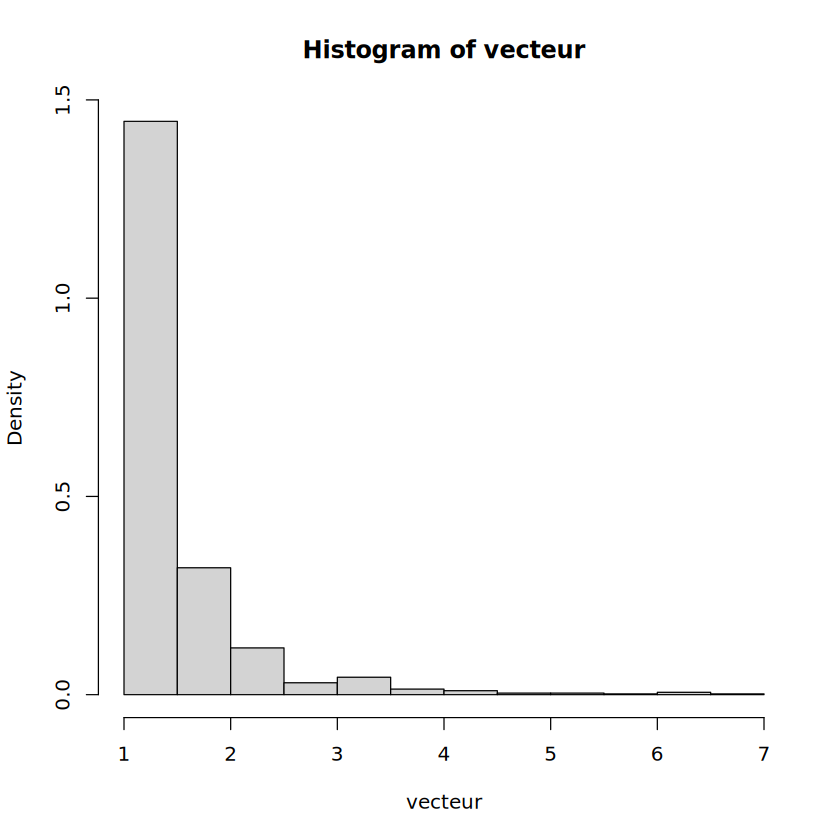

In [7]:
## A FAIRE
par(bg = "white")
uniforme <- runif(1000, min = 0, max = 1)
pareto <- function(x)
    return((1-x)^(-1/3))
vecteur <- sapply(uniforme, pareto)
hist(vecteur, probability = TRUE)

##  2. Estimation

Dans cette partie on souhaite comparer les estimateurs par la méthodes des moments et du maximum de vraisemblance du parametre $\alpha$.
<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Calculer (à la main) l'estimateur par la méthode des moments de $\alpha$.</li>
        <li> Discuter en quelque mots si cet estimateur est fortement consistent ? Asymptotiquement normal ? </li>
        <li> Illustrer numériquement la consistence de l'estimateur des moments. </li>
        <li> Illustrer, en vous inspirant de la première partie du TP 2.1 numériquement, la normalité asymptotique de l'estimateur des moments.</li>
    </ol>
</div>

In [ ]:
#A FAIRE
estimateur <- function(x)
    return(mean(x)/(mean(x)-1))


La méthode des moments consiste à calcul l'espérance de la variable aléatoire. 
Puis, on trouve la fonction telle que $\tilde{\alpha}_n=f^{-1}(\bar{X}_n)$ et le tour est joué

La fonction $f^{-1}$ n'est pas définie en 1 donc non continue en 1, et il en est de même pour la dérivée.
Donc, l'estimateur n'est ni fortement consistant ni asymptotiquement normal.

En fait, cela dépend : la fonction $f^{-1}$ est bien continue sur $]1;+\infty[$, mais bon, cela signifie qu'on fait tous les calculs précédents sur le même intervalle et donc je comprends plus si c'est cohérent ou pas.

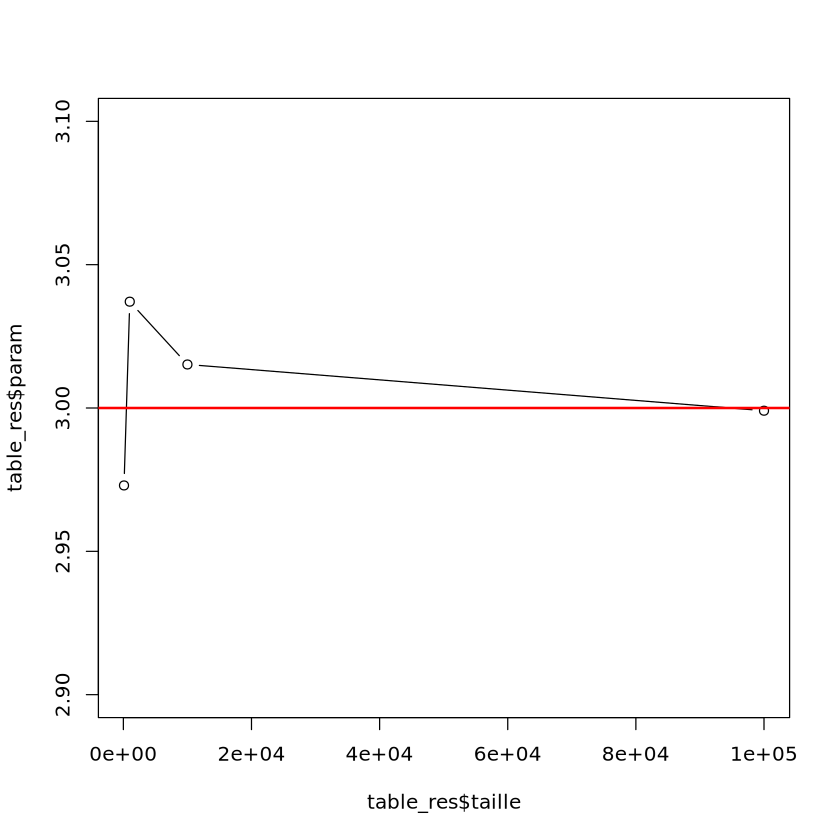

In [49]:
n <- c(100, 1000, 10000, 100000) #création du vecteur des n à tester

table_res = data.frame(taille = n, param = numeric(length = length(n)))

alpha_n <- function(vecteur){
    return(mean(vecteur)/(mean(vecteur)-1))
}

for (i in 1:length(n)){
    uniforme <- runif(n[i],min = 0, max = 1)
    vecteur_n <- sapply(uniforme, pareto)
    table_res$param[i] <- alpha_n(vecteur_n)
}

plot(table_res$taille, table_res$param, type = "b", ylim=c(2.9,3.1))

abline(h = 3, col = "red", lwd = 2)

# Construire l’axe x avec tes tailles
# axis(1, at = table_res$taille, labels = table_res$taille)
    



On remarque bien que plus la taille de l'échantillon augmente, plus l'estimateur se rapproche du paramètre $\alpha$ de la loi de Pareto.

Montrons maintenant la convergence asymptotique vers la loi normale de notre estimateur $\alpha_n$

             [,1]        [,2]       [,3]        [,4]        [,5]       [,6]
  [1,] 0.23805020 0.071917757 0.87589769 0.397390179 0.888606687 0.65668430
  [2,] 0.19581298 0.147248472 0.68722042 0.014167880 0.375999766 0.52394242
  [3,] 0.38235774 0.146177099 0.13925999 0.721869252 0.285492998 0.79784327
  [4,] 0.18740751 0.258408670 0.34757667 0.443351171 0.324760699 0.43568647
  [5,] 0.15704120 0.154954355 0.77691331 0.773351382 0.426587518 0.47870973
  [6,] 0.45904505 0.378193077 0.86261077 0.704152507 0.056424925 0.34638183
  [7,] 0.61581638 0.634412082 0.59036318 0.177457038 0.985346286 0.84938201
  [8,] 0.68663700 0.552810519 0.46987886 0.037768310 0.645854379 0.90954893
  [9,] 0.20412717 0.196647402 0.22878352 0.561097184 0.282512029 0.32078233
 [10,] 0.92269430 0.956648524 0.57023144 0.571245236 0.527817344 0.06302622
 [11,] 0.29010818 0.550270493 0.69430852 0.734167702 0.550797109 0.52723808
 [12,] 0.07685623 0.327850683 0.34992227 0.280775883 0.728958302 0.93379407
 [13,] 0.455

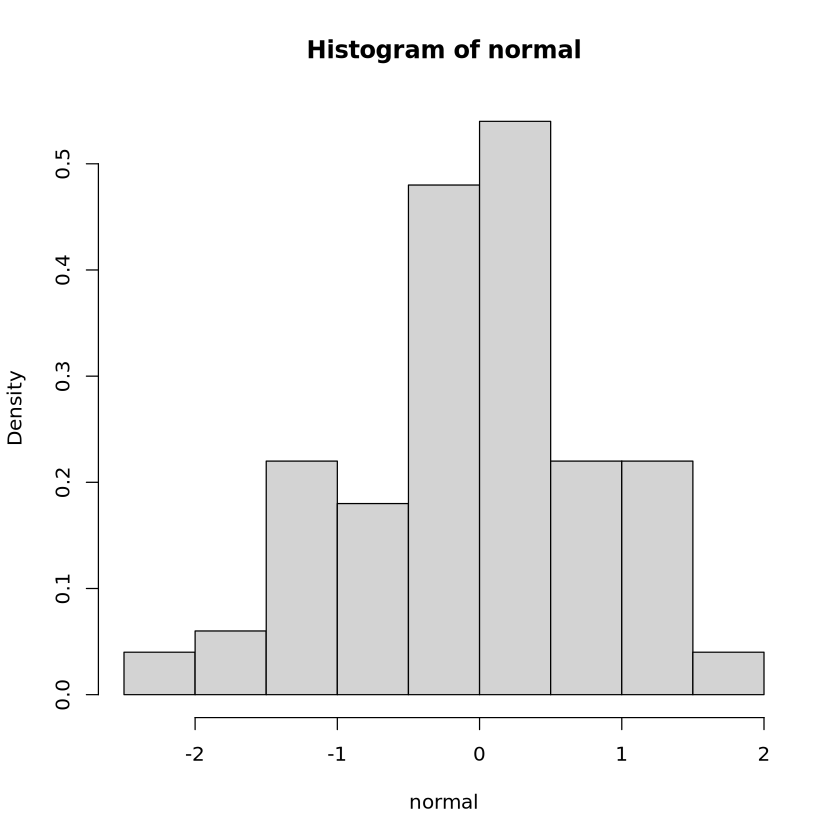

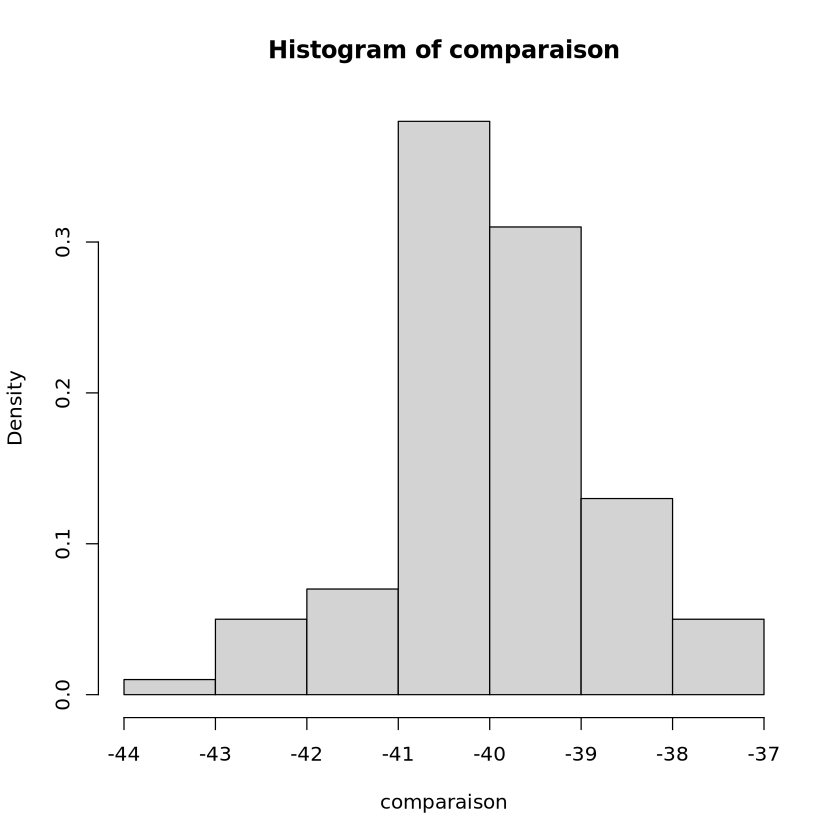

In [72]:

normal <- rnorm(n = 100, sd = 3/4, mean = 0)
matrice <- matrix(data= runif(n = 100*100,min = 0, max=1),nrow = 100, ncol = 100)

print(matrice)
for (i in 1:100){
    apply(matrice,2,pareto) 
}
# print(matrice)
comparaison <- c()
for (i in 1:100){
    comparaison <- c(comparaison,sqrt(100)*(alpha_n(matrice[i,])-3))
}
# comparaison <- sqrt(100)*(comparaison-3)

hist(normal, probability = TRUE)
hist(comparaison, probability = TRUE)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Calculer (à la main) l'estimateur du maximum de vraisemblance de $\alpha$.</li>
        <li> Illustrer numériquement la consistence de l'estimateur des moments. </li>
        <li> Illustrer, en vous inspirant de la première partie du TP 2.1, numériquement la normalité asymptotique de l'estimateur des moments.</li>
    </ol>
</div>

In [ ]:
#A FAIRE

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> En vous inspirant de la première partie du TP 2.1, calculer la variance de chaqun des deux estimateurs.</li>
        <li> L'un vous semble-t-il plus performent ? Est-ce surprenant ?  </li>
    </ol>
</div>

In [ ]:
#A FAIRE

## 3. Pour aller plus loin : le bootstrap.

Maintenant, contrairement à la première partie du TP 2.1, nous supposerons avoir uniquement un vecteur de 100 réalisation de notre loi de Pareto et qu'il nous est IMPOSSIBLE d'en tirer ou simuler d'avantage.

Pour criconvenir a ce désagrément B. Efron propose en 1979 la méthode suivante :

Soit $X_1,\dots,X_n$ notre échantillon. On va alors tirer dans cet échantillon pour construire un echantillon bootstrap.
Formellement on tirer $u(1),\dots,u(n)$ $n$ variables aléatoires i.i.d uniforme sur {$1,\dots,n$} (donc discrète). Léchantillon bootstrap est alors $X_{u(1)},\dots,X_{u(n)}$.

Attention : ce n'est pas un mélange des $(X_i)$, en effet le même $X_{i_0}$ peut apparaitre plusieur fois dans l'échantillon bootstrap.

Pour $B\in \mathbb{N}$ on peut répéter cette opétation $B$ fois et ainsi obtenir $B$ échantillons noté $X_{1}^b,\dots,X_{n}^b$ pour $b$ allant de $1$ à $B$. Sur chaque échantillon on peut alors construire un estimateur de $\alpha$ et ainsi obtenir $\hat \alpha_n^1,\dot,\hat \alpha_n^B$, $B$ estimateur bootstrap.

Sous certaine condition, en particulier si $\sqrt{n}(\hat \alpha_n-\alpha)\underset{n\rightarrow\infty}{\longrightarrow}\mathcal{N}(0,\sigma^2)$, on a 
$$
\sqrt{B}\left(\frac{1}{B}\sum_{b=1}^B\hat \alpha_n^b-\alpha_n\right)\underset{n\rightarrow\infty}{\longrightarrow}\mathcal{N}(0,\sigma^2).
$$

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Mettre en place une procédure bootsrap pour l'estimateur du maximum de vraisemblance. Vous pourrez vous aider de la fonction <code>sample()<code>. </li>
        <li> Vérifier numériquement que la moyenne des estimateur bootstrap vérifie bien la propriété ci dessus. </li>
    </ol>
</div>

In [ ]:
#A FAIRE

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions : Les questions 2 et 3 concernent les tests que nous verrons demain, vous pourrez donc y revenir à ce moment la.
    <ol>
        <li> Se servir de cette méthode pour estimer la variance de l'estimateur du maximum de vraisemblance. </li>
        <li> Comment se servir de cette méthode pour construire un test de niveau $0.95$ testant l'hypothèse $H_0 : \alpha= 3$ contre l'alternative $H_1\neq 3$ </li>
        <li> Vous chercherez à évaluer la puissance de ce test en fonction de $\alpha$. </li>
    </ol>
</div>

In [ ]:
#A FAIRE